In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

C:\Users\USER\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
plt.rcParams['figure.figsize'] = [2, 2]

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

## Plotting the image with the help of Matplotlib imshow method 

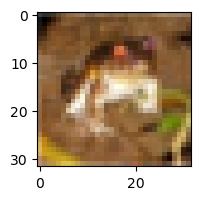

In [7]:
plt.imshow(X_train[0])

## Now converting the 2 dimensional array into 1-D array

In [8]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X,y, index):
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

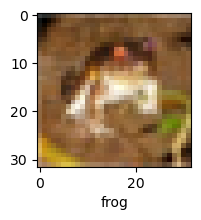

In [11]:
plot_sample(X_train, y_train, 0)

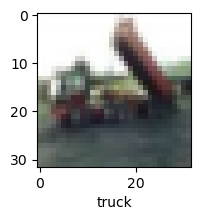

In [12]:
plot_sample(X_train, y_train, 2)

### Normalizing the dataset By dividing it with 255

In [13]:
X_train = X_train/255.0
X_test = X_test/255.0

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5431 - accuracy: 0.4565
Epoch 4/5
1563/1563 [==============================] - 88s 57ms/step - loss: 1.4347 - accuracy: 0.4924


In [15]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 7s 23ms/step - loss: 1.5188 - accuracy: 0.4626


[1.518815040588379, 0.4625999927520752]

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 20ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.49      0.54      1000
           1       0.36      0.85      0.51      1000
           2       0.45      0.26      0.33      1000
           3       0.43      0.21      0.29      1000
           4       0.47      0.34      0.39      1000
           5       0.42      0.33      0.37      1000
           6       0.56      0.50      0.53      1000
           7       0.42      0.68      0.52      1000
           8       0.63      0.52      0.57      1000
           9       0.49      0.43      0.46      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.45     10000
weighted avg       0.48      0.46      0.45     10000



In [17]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32, kernel_size = (3,3),activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 40s 21ms/step - loss: 1.4727 - accuracy: 0.4714
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1293 - accuracy: 0.6085
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0039 - accuracy: 0.6515
Epoch 4/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9226 - accuracy: 0.6797
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8645 - accuracy: 0.6992
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8131 - accuracy: 0.7170
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7635 - accuracy: 0.7336
Epoch 8/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7272 - accuracy: 0.7476
Epoch 9/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.6859 - accuracy: 0.7616
Epoch 10/10
1563/1563 [==============================] - 36s 23m

In [20]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.8903 - accuracy: 0.7048


[0.890256941318512, 0.704800009727478]

In [21]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

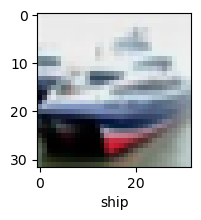

In [23]:
plot_sample(X_test, y_test ,1)

In [24]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[6.22474775e-03, 2.21722454e-04, 1.45973489e-02, 7.70199835e-01,
        2.84851948e-03, 8.39931145e-02, 1.08826019e-01, 8.05237622e-04,
        1.06239989e-02, 1.65958272e-03],
       [1.33227529e-02, 4.96871844e-02, 2.77305207e-05, 2.62082995e-05,
        4.92502513e-05, 4.84576162e-07, 3.37608799e-06, 6.67364759e-08,
        9.30528820e-01, 6.35404186e-03],
       [6.60523474e-02, 1.98887922e-02, 1.06424547e-03, 4.93957940e-03,
        1.38136500e-03, 1.86952064e-04, 4.81567928e-04, 1.48455356e-03,
        8.89590859e-01, 1.49298431e-02],
       [9.04701054e-01, 8.52526224e-04, 1.38416141e-02, 3.36978788e-04,
        1.52607018e-03, 6.10598318e-06, 2.35690222e-05, 2.16111323e-04,
        7.84759969e-02, 1.99716815e-05],
       [6.94505979e-06, 3.01440377e-05, 4.02162643e-03, 2.39560045e-02,
        8.54788840e-01, 3.34836682e-03, 1.13543555e-01, 8.36576510e-06,
        2.78591324e-04, 1.73779154e-05]], dtype=float32)

In [25]:
y_classes =[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [26]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

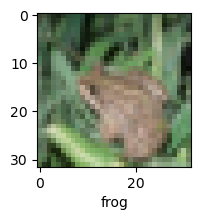

In [32]:
plot_sample(X_test, y_test, 4)

In [33]:
classes[y_classes[4]]

'deer'

In [35]:
#Making mistakes because accuracy is 70%